# Pre-processing and Modeling

## Import and Load Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df_eda.csv')

# Feature Engineering

## Categorical Features


In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features 

Index(['Customer ID', 'Customer Status', 'Churn Label', 'Churn Category',
       'Churn Reason', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'City', 'Gender', 'Married', 'Dependents',
       'Subscription Type', 'Age Category', 'Community Type'],
      dtype='object')

I droped the following columns:
`Customer ID`,`Customer Status`, `Churn Reason`,`Churn Category`, `Phone Service`, `Internet Service`,`City`,`Age Category`
Then tranform categorical features using One-Hot Encoding to avoid introducing artificial order or importance among categories. 


In [14]:
features_to_drop = ['Customer ID', 'Customer Status', 'Churn Reason', 'Churn Category', 
                    'Phone Service', 'Internet Service', 'City', 'Age Category']

data_for_encoding = df.drop(columns=features_to_drop)

df_encoded = pd.get_dummies(data_for_encoding, drop_first=True).astype(int)


In [15]:
df_encoded.astype(int)

,Satisfaction Score,Churn Value,Churn Score,CLTV,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,...,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Married_Yes,Dependents_Yes,Subscription Type_Internet Only,Subscription Type_Phone Only,Community Type_Suburban,Community Type_Urban
0,3,1,91,5433,0,1,0,8,39,39,...,1,0,0,1,0,0,1,0,0,1
1,3,1,69,5302,1,8,48,17,80,633,...,1,1,0,0,1,1,0,0,0,1
2,2,1,81,3179,0,18,11,52,95,1752,...,1,0,0,1,0,1,0,0,0,1
3,2,1,88,5337,1,25,19,12,98,2514,...,1,0,0,0,1,1,0,0,0,1
4,2,1,67,2793,1,37,6,14,76,2868,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,0,45,5306,0,72,22,0,21,1419,...,1,0,0,0,0,0,0,1,0,0
7039,3,0,59,2140,1,24,36,24,84,1990,...,1,0,1,1,1,1,0,0,1,0
7040,4,0,71,5560,4,72,29,59,103,7362,...,1,1,0,0,1,1,0,0,0,0
7041,4,0,59,2793,1,11,0,17,29,346,...,1,0,0,0,1,1,1,0,0,0


## Preprocessing for numerical data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Satisfaction Score                 7043 non-null   int64  
 2   Customer Status                    7043 non-null   object 
 3   Churn Label                        7043 non-null   object 
 4   Churn Value                        7043 non-null   int64  
 5   Churn Score                        7043 non-null   int64  
 6   CLTV                               7043 non-null   int64  
 7   Churn Category                     1869 non-null   object 
 8   Churn Reason                       1869 non-null   object 
 9   Referred a Friend                  7043 non-null   object 
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

In [33]:
numerical_features = ['Satisfaction Score','Number of Referrals', 'Tenure in Months',
                        'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
                        'Monthly Charge', 'Age','Number of Dependents','Population Density']
numerical_data = df_encoded[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
df_encoded[numerical_features] = scaled_data

### Drop unnecessary columns

In [36]:
df_final = df_encoded.drop(columns=['Churn Score', 'CLTV','Total Charges', 'Total Refunds',
                                   'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue', 
                                    'Zip Code', 'Latitude', 'Longitude','Population', 'churn_rate','Churn Label_Yes'])

In [38]:
df_final.columns

Index(['Satisfaction Score', 'Churn Value', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Age',
       'Number of Dependents', 'Population Density', 'Referred a Friend_Yes',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Multiple Lines_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Gender_Male', 'Married_Yes',
       'Dependents_Yes', 'Subscription Type_Internet Only',
       'Subscription Type_Phone Only', 'Community Type_Suburban',
       'Community Type_Urban'],
      dtype=

# Train Test Split

In [39]:
X = df_final.drop(['Churn Value'], axis=1)
y = df_final['Churn Value']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Base Line: Logistic Regression

In [58]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9481902058197303

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1009
           1       0.93      0.89      0.91       400

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.94      1409
weighted avg       0.95      0.95      0.95      1409



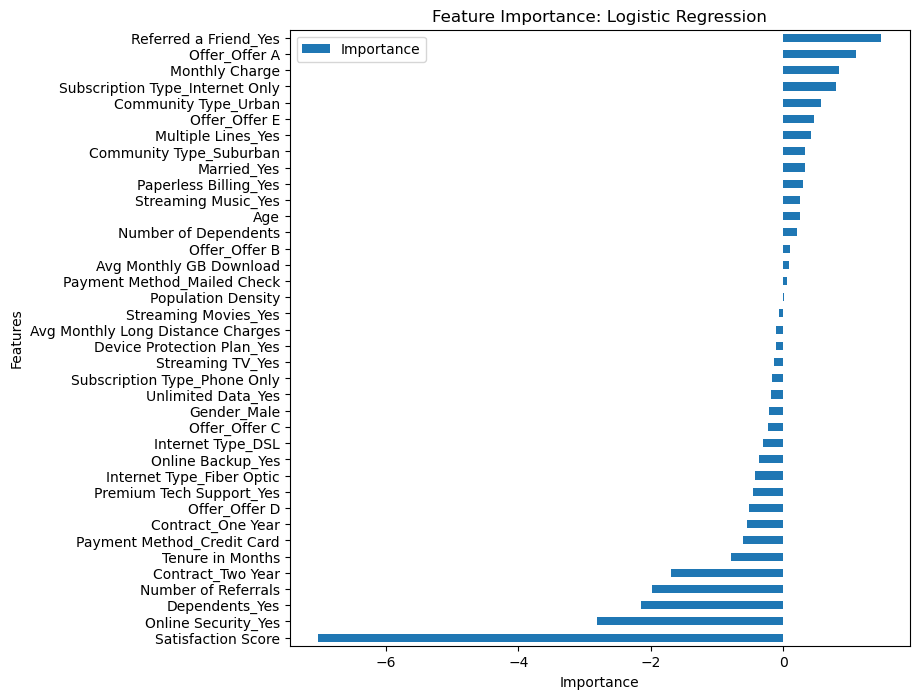

In [75]:
coefficients = logistic_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 8), 
                        title='Feature Importance: Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## XGBoost

In [60]:
model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, y_train)

predictions_xgb = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions_xgb)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions_xgb))

Accuracy: 0.9474804826117814

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1009
           1       0.93      0.89      0.91       400

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



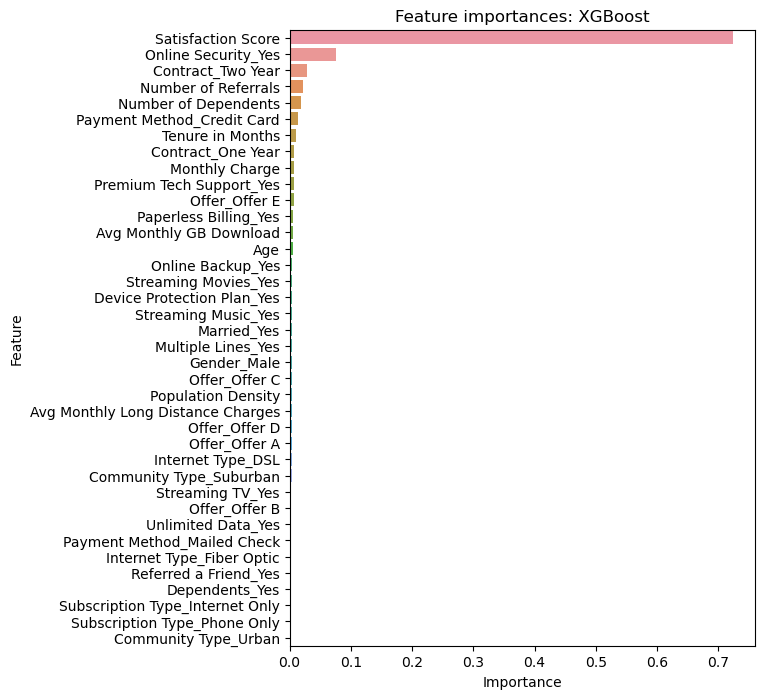

In [76]:
importances = model_xgb.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', orient='h')
plt.title('Feature importances: XGBoost')
plt.show()